In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, ward
import scanpy as sc
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy.ndimage import gaussian_filter1d

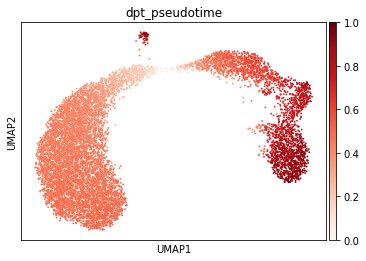

In [2]:
adata=sc.read('adata.h5ad')
sc.pl.umap(adata,color='dpt_pseudotime',vmax=1,save='pseudotime_umap1',cmap='Reds')
meso_ind=np.load('meso_id.npy')
neuro_ind=np.load('neuro_id.npy')

In [3]:
meso=adata[meso_ind,:]
neuro=adata[neuro_ind,:]
meso.var['mt'] = meso.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(meso, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
neuro.var['mt'] = neuro.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(neuro, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.highly_variable_genes(meso, min_mean=0.05, max_mean=3)
meso = meso[:, meso.var.highly_variable]
sc.pp.highly_variable_genes(neuro, min_mean=0.05, max_mean=3)
neuro = neuro[:, neuro.var.highly_variable]


Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


<AxesSubplot:>

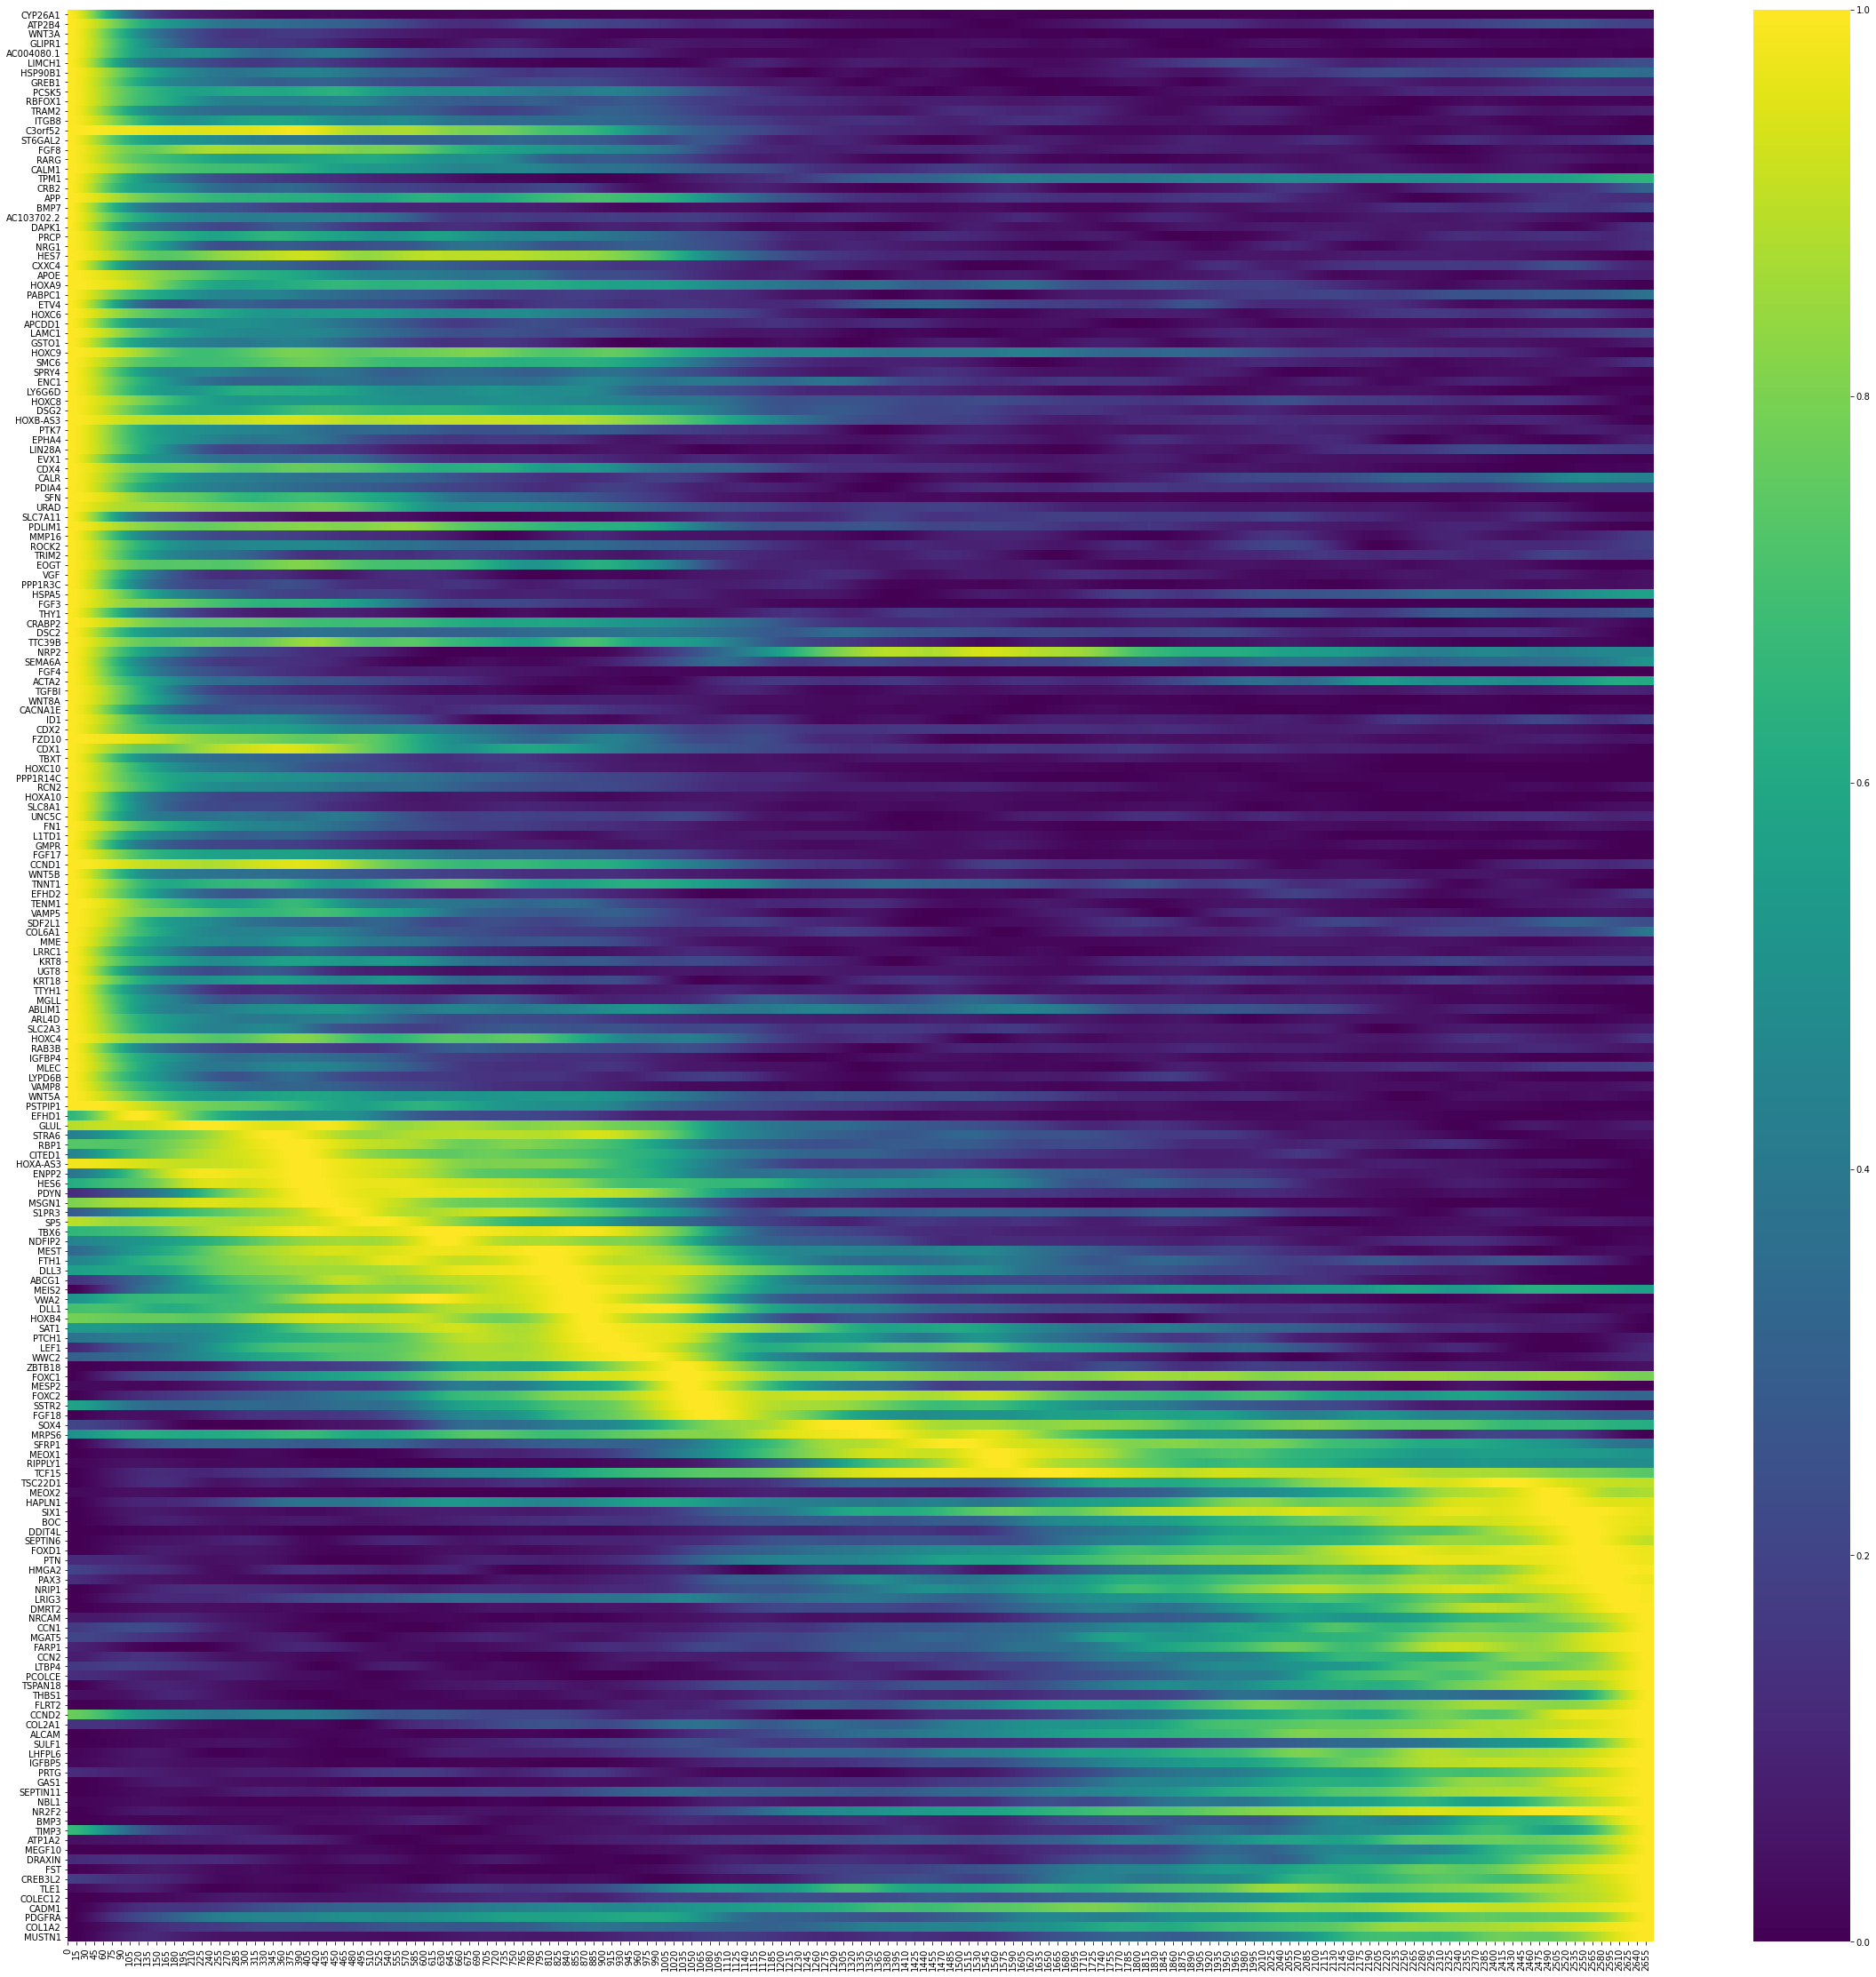

In [4]:
sigma_gaussian_filter=50
top_localized_genes=200
mesoMatrix=meso.X.todense()
geneMeso=meso.var_names.values
sorted_ind=np.argsort(meso.obs['dpt_pseudotime'])
mesoMatrix=mesoMatrix[sorted_ind[:],:]
mesoMatrix=mesoMatrix-np.mean(mesoMatrix,axis=0)
mesoMatrix=mesoMatrix/np.std(mesoMatrix,axis=0)
mesoMatrix = gaussian_filter1d(mesoMatrix,sigma_gaussian_filter, axis=0) 
gene_variation=np.amax(mesoMatrix,axis=0)-np.amin(mesoMatrix,axis=0)
maxVariation_sorted_ind=np.asarray(np.argsort(gene_variation)).flatten()
mesoMatrix=mesoMatrix[:,maxVariation_sorted_ind]
geneMeso=geneMeso[maxVariation_sorted_ind]
mesoMatrix=mesoMatrix[:,-top_localized_genes:]
geneMeso=geneMeso[-top_localized_genes:]
ap_sorted_ind=np.asarray(np.argsort(np.argmax(mesoMatrix,axis=0))).flatten()
mesoMatrix=mesoMatrix[:,ap_sorted_ind]
geneMeso=geneMeso[ap_sorted_ind]
mesoMatrix=mesoMatrix-np.amin(mesoMatrix,axis=0)
mesoMatrix=mesoMatrix/np.amax(mesoMatrix,axis=0)
fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(mesoMatrix.T,yticklabels=geneMeso, cbar=True,vmax=1,cmap='viridis',ax=ax)

<AxesSubplot:>

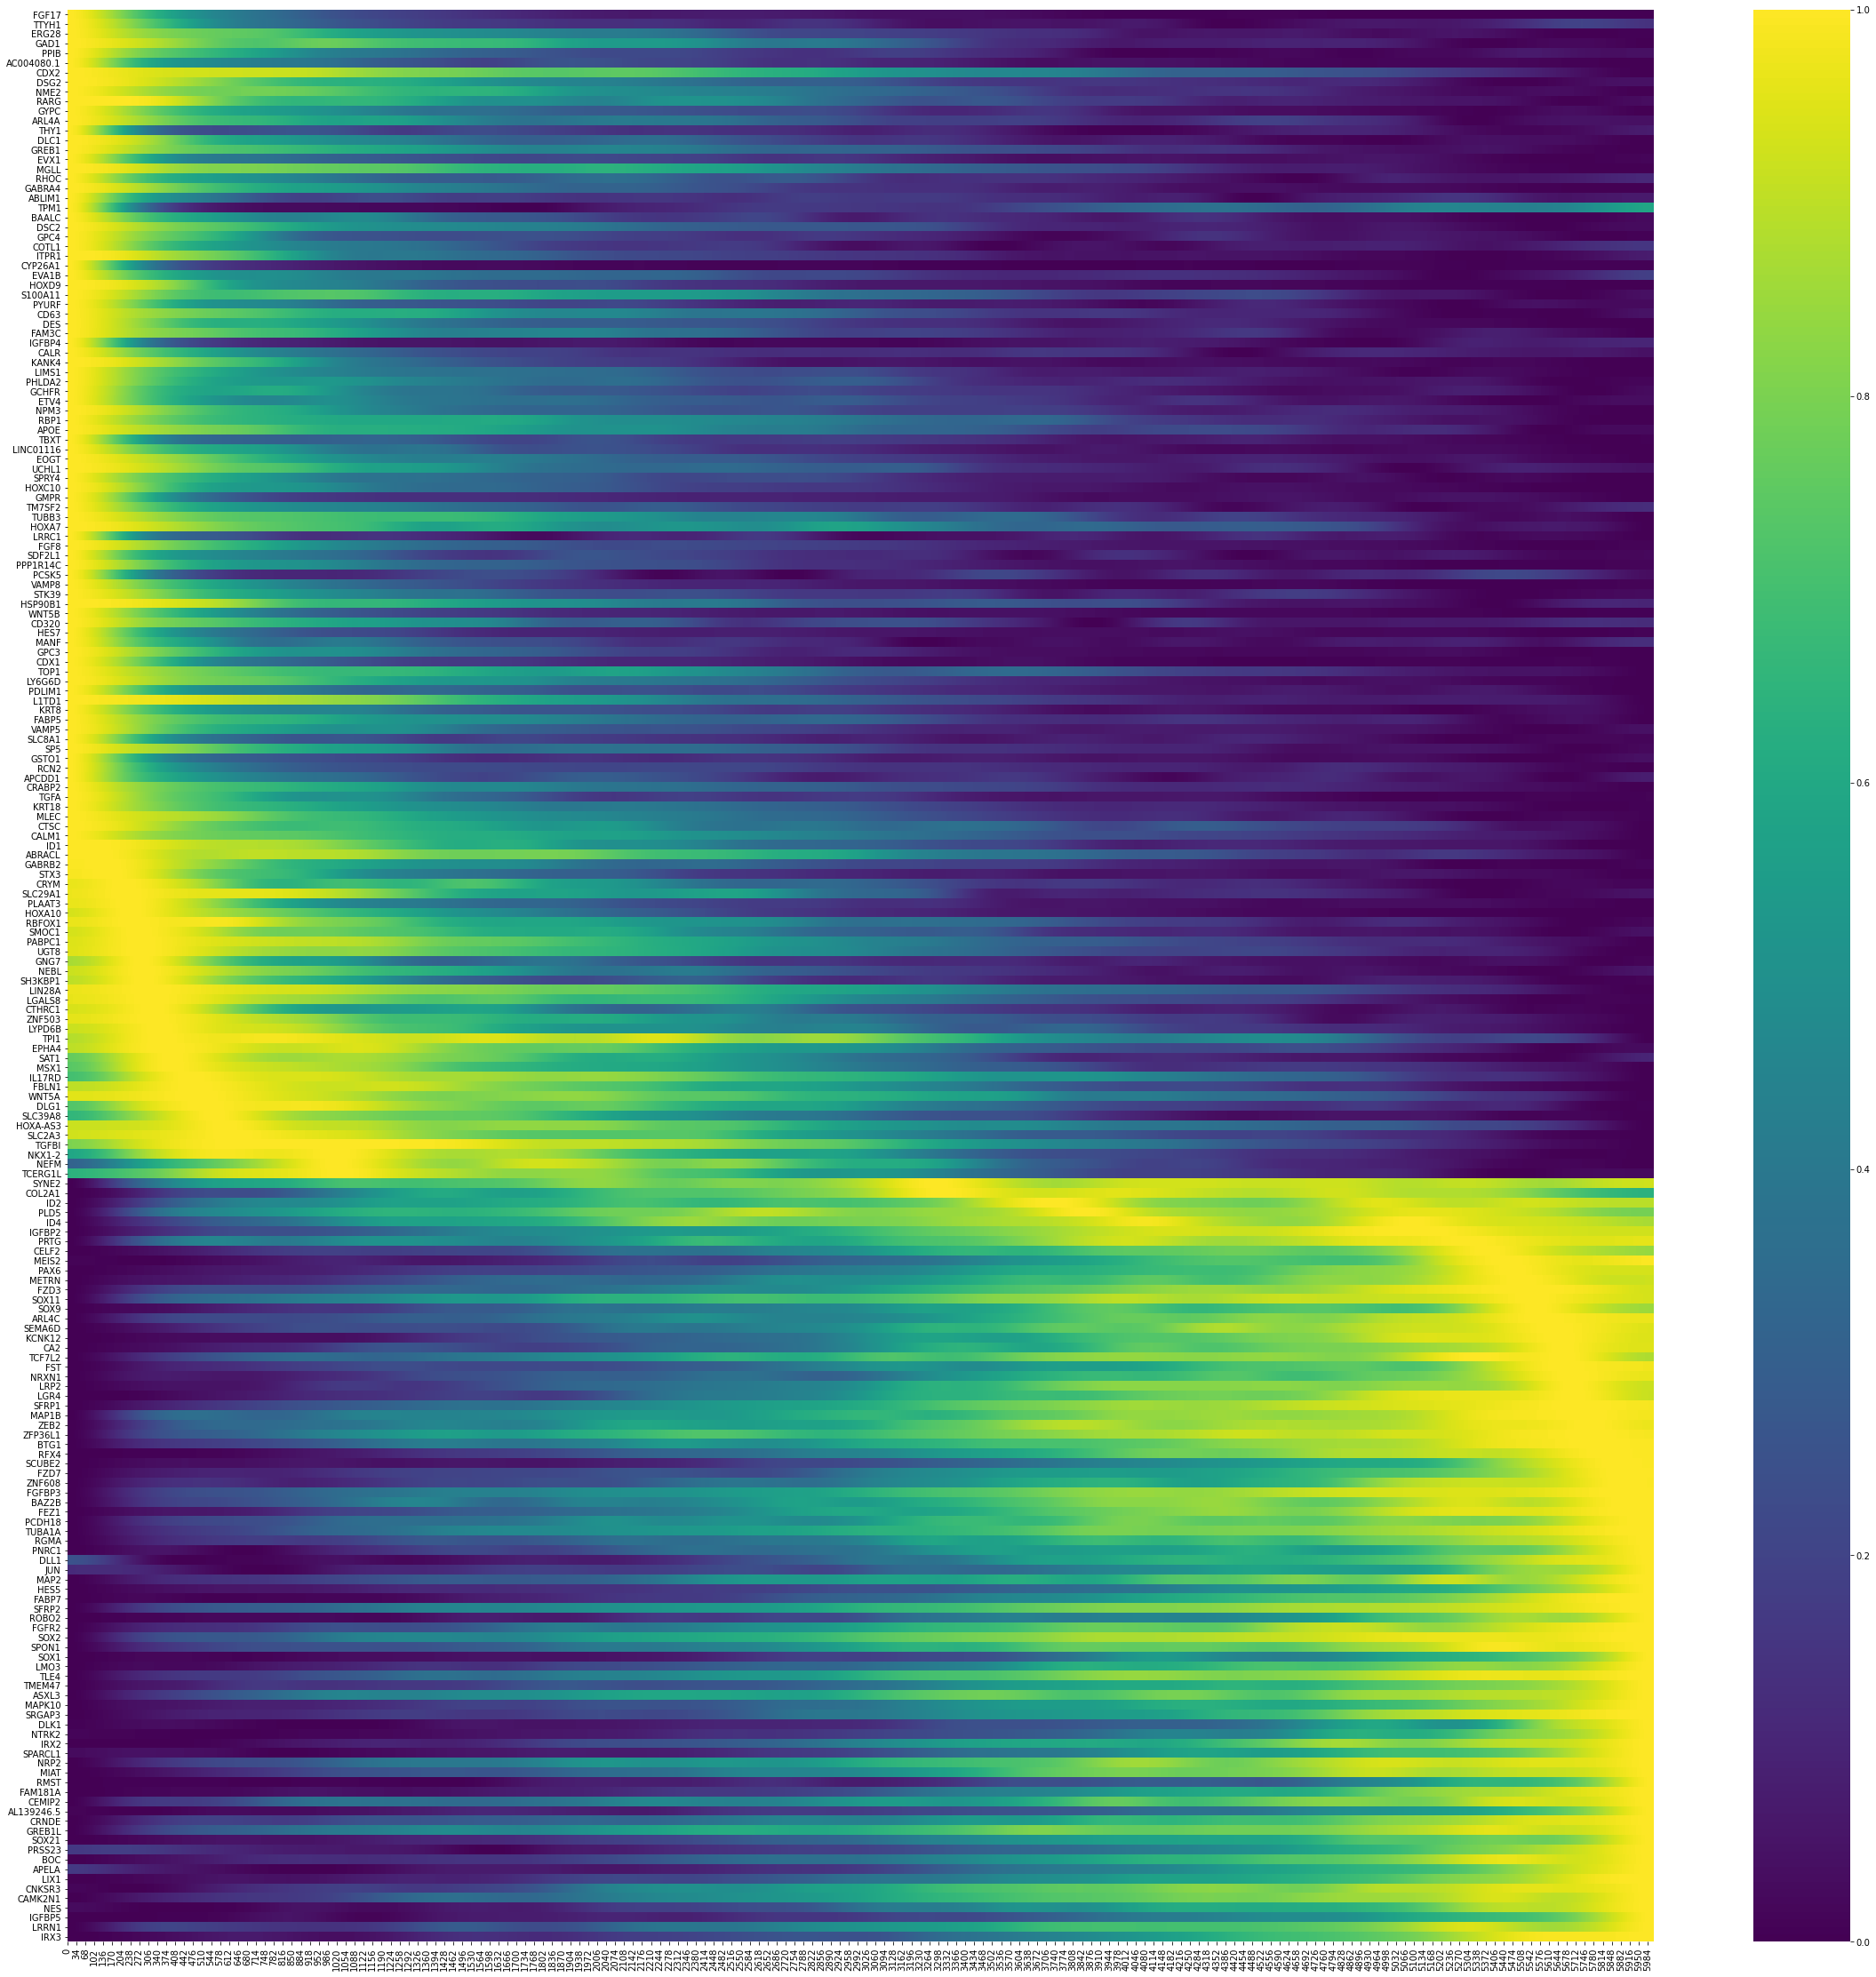

In [5]:
sigma_gaussian_filter=150
top_localized_genes=200
neuroMatrix=neuro.X.todense()
geneNeuro=neuro.var_names.values
sorted_ind=np.argsort(neuro.obs['dpt_pseudotime'])
neuroMatrix=neuroMatrix[sorted_ind[:],:]
neuroMatrix=neuroMatrix-np.mean(neuroMatrix,axis=0)
neuroMatrix=neuroMatrix/np.std(neuroMatrix,axis=0)
neuroMatrix = gaussian_filter1d(neuroMatrix, sigma_gaussian_filter, axis=0) 
gene_variation=np.amax(neuroMatrix,axis=0)-np.amin(neuroMatrix,axis=0)
maxVariation_sorted_ind=np.asarray(np.argsort(gene_variation)).flatten()
neuroMatrix=neuroMatrix[:,maxVariation_sorted_ind]
geneNeuro=geneNeuro[maxVariation_sorted_ind]
neuroMatrix=neuroMatrix[:,-top_localized_genes:]
geneNeuro=geneNeuro[-top_localized_genes:]
ap_sorted_ind=np.asarray(np.argsort(np.argmax(neuroMatrix,axis=0))).flatten()
neuroMatrix=neuroMatrix[:,ap_sorted_ind]
geneNeuro=geneNeuro[ap_sorted_ind]
neuroMatrix=neuroMatrix-np.amin(neuroMatrix,axis=0)
neuroMatrix=neuroMatrix/np.amax(neuroMatrix,axis=0)
fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(neuroMatrix.T,yticklabels=geneNeuro, cbar=True,vmax=1,cmap='viridis',ax=ax)